### Week 10


##### Macro Quoting Functions
* %STR (works at macro compilation)
* %NRSTR (works at macro compilation)

* %BQUOTE (works at macro execution)
* %NRBQUOTE (works at macro execution)
* %SUPERQ (works at macro execution - prevents resolution)
* %UNQUOTE (takes effect at macro execution - restores normal tokenization ...) 

* Compile-time functions only work with literal text.

* Execution-time functions work with macro variables and expressions.

[Macro Quoting: Which Function Should We Use?](https://www.lexjansen.com/pharmasug-cn/2016/PS/PharmaSUG-China-2016-PS05.pdf)

[BASICS OF MACRO PROCESSING - ‘Q’ WAY](https://www.pharmasug.org/proceedings/2014/BB/PharmaSUG-2014-BB12.pdf)

[A Practical Guide to Macro Quoting and Working with Macro Variables](https://www.phusewiki.org/docs/Conference%202017%20IS%20Papers/IS06.pdf)

[Summary of Macro Quoting Functions](https://renenyffenegger.ch/notes/Companies-Products/SAS/programming/macros/quoting/index)

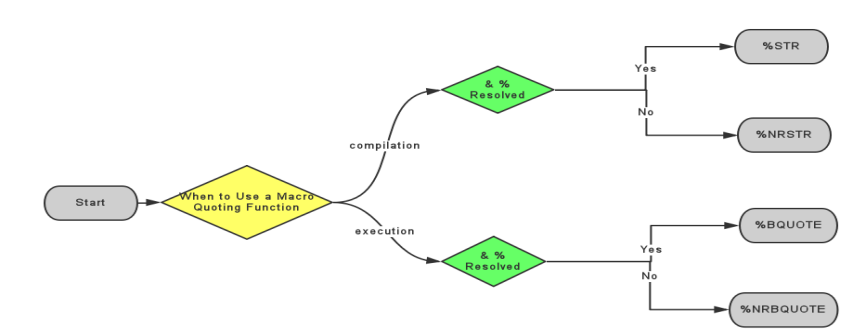

In [2]:
from IPython.display import Image
Image("C:/Data/Macro_Quoting.png")
# Source: As above.

##### Add two more macro quoting functions: %SUPERQ and %UNQUOTE.

Macro quoting functions tell the macro processor to treat these special characters as text rather than as part of the macro language.  Without macro quoting functions, you would have no way to mask the real meaning of these special characters or mnemonics.

[Summary of Macro Quoting Functions and the Characters That They Mask](https://go.documentation.sas.com/?docsetId=mcrolref&docsetTarget=p0pwrvnlcooi3tn0z3g1755ebcng.htm&docsetVersion=9.4&locale=en)

[5 SAS Macro Quoting Functions You Should Know](https://sasnrd.com/sas-macro-quoting-str-nrstr-bquote-nrbquote-superq-unquote/)

[Macro quoting made easy](https://blogs.sas.com/content/sgf/2014/08/15/macro-quoting-made-easy/)

[SAS(R) Online Documentation](https://go.documentation.sas.com/?docsetId=mcrolref&docsetTarget=n09tblrxldh8k0n1kt6dkj3xlxug.htm&docsetVersion=9.4&locale=en)

##### %STR and %NRSTR (Compile-time macro quoting functions) 

- mask a character string during compilation of a macro or macro language statement. They mask the following special characters and mnemonic operators [and thus remove the special meaning ( or functionality)  of those characters]:

+ − * / < > = ¬ ^ ~ ; ,  # blank
AND OR NOT EQ NE LE LT GE GT IN

- also mask the following characters when they occur in pairs and when they are not matched and are marked by a preceding %

' " ( )

##### %NRSTR
 - masks the following characters during compilation of a macro or macro language statement:

& %

%NRSTR function is a macro quoting function which is used to hide the normal meaning of special tokens and other comparison and logical operators so that they appear as constant text as well as to mask the macro triggers ( %, &).

##### Points to remember

* %STR and %NRSTR mask static text input. 
* The text masked by %STR and %NRSTR functions is not sent to the macro processor.
* %STR does not remove the meaning of apostropies.

"Macro quoting functions tell the macro processor to treat these special characters as text rather than as part of the macro language.  Without macro quoting functions, you would have no way to mask the real meaning of these special characters or mnemonics." Russ Tyndall

##### Note for the code

* %STR preserves the leading blank.
* Without the %STR function, the macro variable STEP would store the text proc print only, without the semicolon; SAS would issue a warning.


In [6]:
options nodate nonumber nosource;
ods html close;
%let x_course=    Stat 4197;
%let Course=%str(   Stat 4197);
%put &=x_course &=Course;

In [10]:
%let x_step = proc print; run;
%let y_step=%str(proc print;);
%let step=%str(proc print; run;);
%PUT &=x_step;
%PUT &=y_step;
%PUT &=step;

##### In the example code below, there is an unmatched quote in the constant text that is input to the %STR function.

Neither the %STR nor the %NRSTR alone remove the functionaility of the apostrophe. A % sign in front of the apostrophe is required.

In [17]:
%LET mvar2 = %STR(Beth%'s Assignment Report);
%PUT &=mvar2;


In [ ]:
%LET mvar2 = %STR(Beth%'s Assignment Report);
%PUT &=mvar2;

In [ ]:
options nocenter nodate nosource;
ods html close;
 %let singleq=%str(O%'neill) ;
 %put &singleq; 

In [19]:
%LET mvar2 = Beth%bquote(')s Assignment Report;
%PUT &=mvar2;

%NRSTR (NR stands for No rescan or Not Resolved) prevents rescanning and thereby ignores the meaning of & and %.

In [2]:
%let mvar3 =  %NRSTR(AT&T);
%PUT &=mvar3;


7                                                          The SAS System                             18:28 Thursday, March 20, 2025

38         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
38       ! ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
39         
40         %let mvar3 =  %NRSTR(AT&T);
41         %PUT &=mvar3;
MVAR3=AT&T
42         
43         
44         ods html5 (id=saspy_internal) close;ods listing;
45         

8                                                          The SAS System                             18:28 Thursday, March 20, 2025

46         


In [ ]:
options nocenter nodate nosource;
ods html close;
%let ex=%nrstr(This macro is called %showme); 
%put ex=&ex; 

In [ ]:
options nocenter nosource nonotes nodate nonumber;
ods html close;
%LET mvar1 = Beth%bquote('s) Assignment Report;
%PUT &=mvar1;

In [ ]:
%let mvar4 =  %NRSTR(%of defective bulbs);
%PUT &=mvar4;

Try the following 3 code chunks (Source: SAS nrd).

Why are the log/outputs different?
```
%let ds = sashelp.class;
%let st = proc print data=&ds; run;;
%put &st;
```
```
%let ds = sashelp.class;
%let st = %str(proc print data=&ds; run;);
%put &st;
```

````
%let ds = sashelp.class;
%let st = %nrstr(proc print data=&ds; run;);
%put &st;
````

##### %BQUOTE and %NRBQUOTE (Execution-time macro quoting functions)

###### Note for the code
 %BQUOTE AND %NRBQUOTE functions mask values during execution of a macro or a macro language statement in open code.

The %BQUOTE (also called blind quote) is used to remove meaning from unanticipated characters in resolved text during macro execution. It masks all special characters and mnemonic operators except ampersands and percent signs.

###### In the example below, 

* the DATA step assigns the value Kids’ Corner to the variable STORE, enclosing the character string in double quotation marks.

* the SYMPUTX routine assigns the value of the variable STORE to a macro variable.
The %BQUOTE function masks the unmatched single quote mark.


In [3]:
*%BQUOTE vs. %SUPERQ;
options nonotes nosource nonumber nosymbolgen;
ods html close;
data test;
  store="Kids' Corner";
  call symputx('m_store',store);
run;
%put %bquote(&m_store);
%put %superq(m_store);



                                                           The SAS System                               13:23 Friday, March 21, 2025

Kids' Corner
Kids' Corner

                                                           The SAS System                               13:23 Friday, March 21, 2025

E3969440A681A2408885998500000005


##### %SUPERQ (Execution-time quoting function)

"%SUPERQ masks everything without any further resolution which makes it the best execution-time quoting function to use." Russ Tyndall (SAS Blog Post).

##### Note for the code

The %SUPERQ function operates only on the values of the macro variable and mask all items that require quoting during macro execution.  (Carpenter, 2016)
 
The %SUPERQ function accepts as its argument only the name of a single macro variable with no leading ampersand.



In [4]:
options nocenter nodate nosource;
ods html close;
data _null_; 
call symputx('Courses', 'STAT4197&6197'); 
run; 
%put %nrbquote(&Courses); 
%put %superq(Courses); 



The SAS System

STAT4197&6197
STAT4197&6197

The SAS System

E3969440A681A2408885998500000006


[Batkhan, 2017. Passing comma-delimited values into SAS macros and macro functions](https://blogs.sas.com/content/sgf/2019/07/17/passing-comma-delimited-values-into-sas-macros-and-macro-functions/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+TheSasTrainingPost+%28The+SAS+Learning+Post+-%3E+SAS+Users%29)

%SUPERQ–masks special characters and mnemonics during macro execution. However, it also prevents further resolution of any macros or macro variables. 

[Macro Interview Questions](http://interviewquestionsworld.blogspot.com/2017/08/sas-macro-interview-questions.html)

[ESSENTIALS OF MACRO QUOTING FUNCTIONS IN SAS®](https://www.mwsug.org/proceedings/2015/RF/MWSUG-2015-RF-08.pdf)

###### %UNQUOTE
- restores the meaning of any special characters and mnemonics masked by quoting function during macro execution.

Syntax: %UNQUOTE (Character string| text expression)
Here the macro variable, Course, will not resolve as it is masked by the %NRSTR function. However, the %UNQUOTE function reestablishes the usual meaning of “&” in macro language and the macro variable resolves to its value.



In [25]:
%let Course = STAT6197;
%put %nrstr(&Course);
%put %unquote(%nrstr(&Course));

In [28]:
options notes source;
data _null_;
run;
%macro mymac;
  SASHELP.CLASS
%mend;
%let mvar = %nrstr(%mymac);
title "%unquote(&mvar)";
options nocenter nodate nonumber;
proc print data=sashelp.class (obs=2);
run;

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0


[Difference between %nrbquote and %superq](https://communities.sas.com/t5/SAS-Programming/difference-between-nrbquote-and-superq/td-p/167893#:~:text=SUPERQ%20masks%20the%20same%20characters,argument%20before%20masking%20the%20result.)

%NRBQUOTE will always try to resolve down as far as it can before masking the value and this is why you are getting a warning.  %SUPERQ mask everything immediately therefore no warning is generated.